# Entraînement à l'analyse exploratoire de données spatiales

In [1]:
import geopandas

geoberlin = geopandas.read_file(".\\data\\berlin-districts.geojson")
geoberlin.head()

,district,district_group,median_price,geometry
0,Blankenfelde/Niederschönhausen,Pankow,37.5,"MULTIPOLYGON (((1493006.880 6912074.798, 14929..."
1,Helmholtzplatz,Pankow,58.0,"MULTIPOLYGON (((1493245.549 6900059.696, 14932..."
2,Wiesbadener Straße,Charlottenburg-Wilm.,50.0,"MULTIPOLYGON (((1481381.452 6885170.698, 14813..."
3,Schmöckwitz/Karolinenhof/Rauchfangswerder,Treptow - Köpenick,99.0,"MULTIPOLYGON (((1526159.829 6872101.044, 15261..."
4,Müggelheim,Treptow - Köpenick,25.0,"MULTIPOLYGON (((1529265.086 6874326.842, 15292..."


<AxesSubplot: >

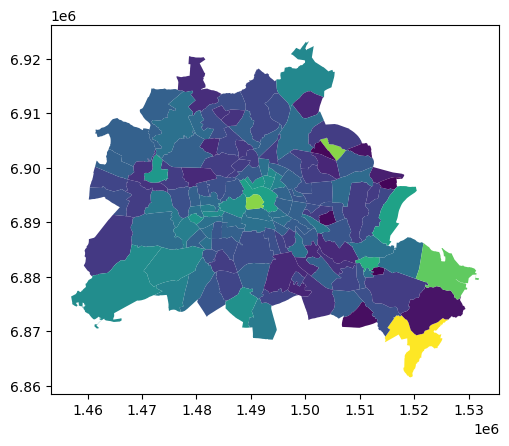

In [2]:
geoberlin.plot(column="median_price")

<AxesSubplot: >

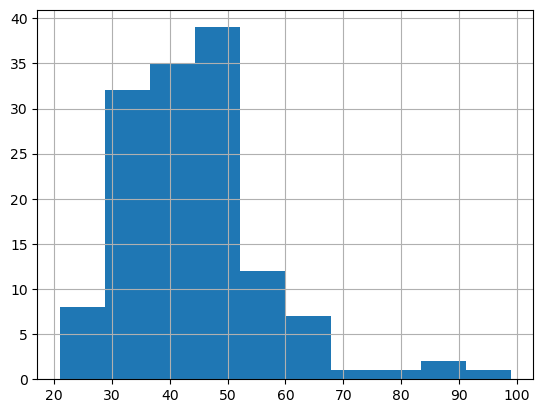

In [3]:
geoberlin["median_price"].hist()
## distribution asymétrique. Préférer une représentation
##+ en quantiles :

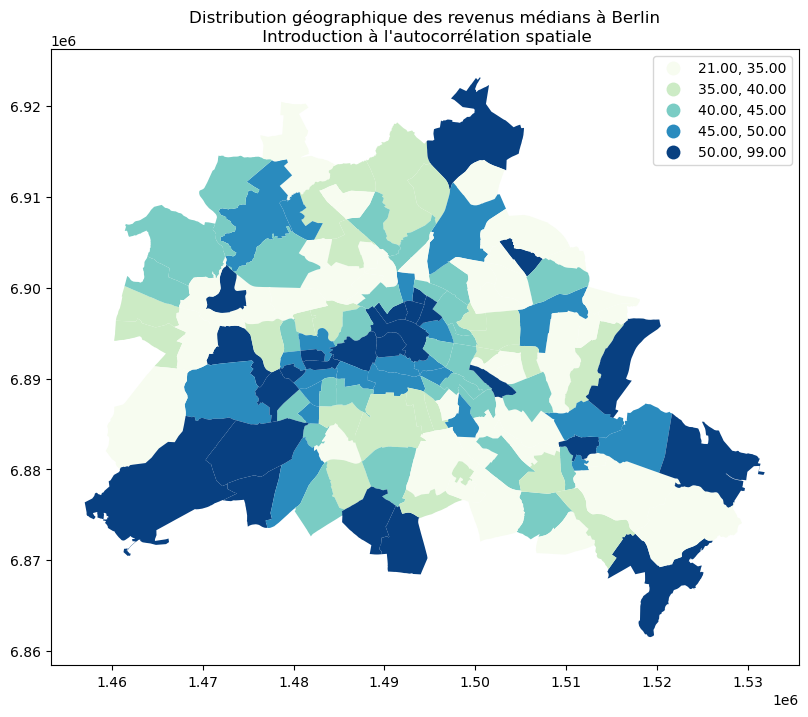

In [6]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize=(10,8), subplot_kw=dict(aspect="equal"))
geoberlin.plot(column="median_price", scheme="Quantiles",
              k=5, cmap="GnBu", legend=True, ax=ax)
plt.title("Distribution géographique des revenus médians à Berlin\n Introduction à l'autocorrélation spatiale")
plt.show()

On suppose des zones de concentrations avec des revenus médians élevés et faibles.
Les revenus les plus faibles semblent se situer surtout au Nord et au Sud.
Tandis que les revenus les plus forts sont soit au centre, soit à l'ouest.

## Spatial autocorrelation
### Similarité spatiale

In [8]:
## pondération spatiae par la Continguité de Queen :
import libpysal

wq = libpysal.weights.Queen.from_dataframe(geoberlin)
wq.transform = "r"

### Similarité attributaire

In [12]:
y = geoberlin["median_price"]
ylag = libpysal.weights.lag_spatial(wq, y)

ylag

array([45.2       , 52.625     , 45.75      , 32.5       , 63.5       ,
       42.        , 45.625     , 44.14285714, 43.33333333, 38.75      ,
       41.5       , 50.8       , 36.6875    , 54.36363636, 54.375     ,
       38.92857143, 38.125     , 50.9       , 35.6875    , 59.66666667,
       46.875     , 46.92857143, 49.58333333, 47.25      , 53.25      ,
       40.57142857, 37.66666667, 37.14285714, 40.75      , 41.5       ,
       45.9       , 35.3       , 47.9375    , 47.33333333, 40.        ,
       44.        , 58.3       , 53.16666667, 42.166     , 43.75      ,
       51.625     , 52.3       , 50.5       , 46.91666667, 47.        ,
       38.125     , 35.33333333, 48.83333333, 46.6       , 43.125     ,
       40.805     , 41.33333333, 42.        , 45.7075    , 55.66666667,
       46.2       , 47.33333333, 50.47875   , 49.2075    , 42.92857143,
       43.4       , 40.78571429, 37.42857143, 32.75      , 45.57142857,
       51.25      , 44.        , 33.33333333, 33.25      , 42.  

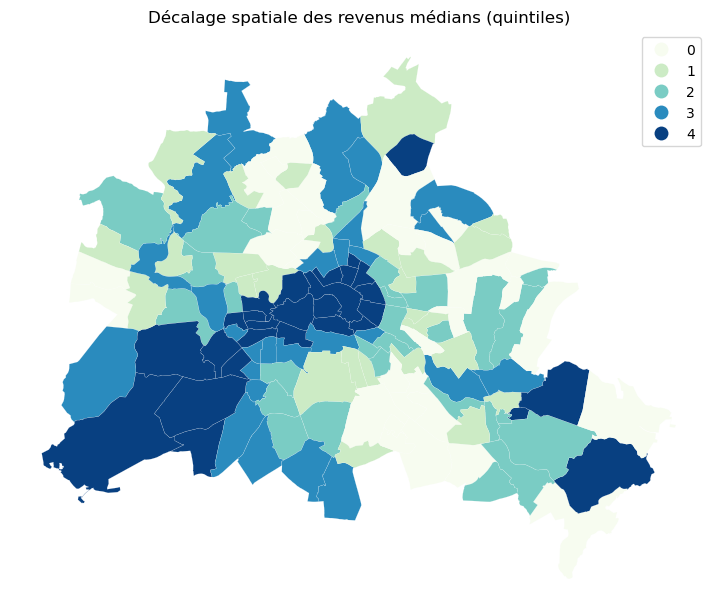

In [14]:
import mapclassify as mc

ylagq5 = mc.Quantiles(ylag, k=5)

f, ax = plt.subplots(1, figsize=(9,9),
                    subplot_kw=dict(aspect="equal"))
geoberlin.assign(cl=ylagq5.yb).plot(column="cl", categorical=True,
                                  k=5, cmap="GnBu", linewidth=0.1,
                                  edgecolor="white", legend=True, ax=ax)
ax.set_axis_off()
plt.title("Décalage spatiale des revenus médians (quintiles)")
plt.show()

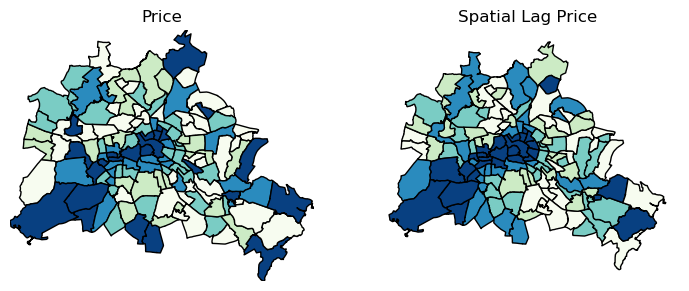

In [16]:
import numpy 

geoberlin["lag_median_price"] = ylag

fig, ax = plt.subplots(1, 2, figsize=(2.16*4, 4),
                      subplot_kw=dict(aspect="equal"))
geoberlin.plot(column="median_price", ax=ax[0],
              edgecolor="k", scheme="quantiles",
              k=5, cmap="GnBu")
ax[0].axis(geoberlin.total_bounds[numpy.asarray([0, 2, 1, 3])])
ax[0].set_title("Price")

geoberlin.plot(column="lag_median_price", ax=ax[1], edgecolor="k",
              scheme="quantiles", cmap="GnBu", k=5)
ax[0].axis(geoberlin.total_bounds[numpy.asarray([0, 2, 1, 3])])
ax[1].set_title("Spatial Lag Price")
ax[0].axis("off")
ax[1].axis("off")
plt.show()